## Longwave IR Radiation Ratios

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

username = 'rppoland18'
token = '3127641b73e77c24'
datastream = 'gucqcrad1longM1.c2'
startdate = '2021-09-01'
enddate = '2023-06-15'

result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
rad = act.io.read_arm_netcdf(result)
rad

[DOWNLOADING] gucqcrad1longM1.c2.20220610.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220130.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20230216.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20211008.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220301.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220126.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220804.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20230611.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20230420.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20211024.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220521.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20230607.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20211203.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220828.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20221116.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220317.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20210920.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220812.000000.cdf
[DOWNLOADING] gucqcrad1longM1.c2.20220710.0000

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 278MB
Dimensions:                                (time: 940320)
Coordinates:
  * time                                   (time) datetime64[ns] 8MB 2021-09-...
Data variables: (12/70)
    base_time                              (time) datetime64[ns] 8MB 2021-09-...
    time_offset                            (time) datetime64[ns] 8MB 2021-09-...
    BestEstimate_down_short_hemisp         (time) float32 4MB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_BestEstimate_down_short_hemisp      (time) int32 4MB dask.array<chunksize=(1440,), meta=np.ndarray>
    source_BestEstimate_down_short_hemisp  (time) int32 4MB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_short_hemisp                      (time) float32 4MB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                                     ...
    MFRSR_flag                             (time) int32 4MB dask.array<chunksize=(1440,), meta=np.ndarray>
    zenith                                 (time) float32 4MB dask.array<chunksize=(1440,), meta=np.ndarray>
    sun_earth_distance                     (time) float32 4MB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                                    (time) float32 4MB 38.96 ... 38.96
    lon                                    (time) float32 4MB -107.0 ... -107.0
    alt                                    (time) float32 4MB 2.886e+03 ... 2...
Attributes: (12/46)
    command_line:                        qcrad1long -n qcrad1long_sirsc2 -s g...
    Conventions:                         ARM-1.3
    process_version:                     vap-qcrad1long-6.6-0.el7
    dod_version:                         qcrad1long-c2-2.3
    input_datastreams:                   gucgndrad60sM1.b1 : 2.20 : 20210825....
    site_id:                             guc
    ...                                  ...
    configurable_limits:                 \ncnf0 = 16.0                * snow ...
    history:                             created by user howie on machine pro...
    _file_dates:                         ['20210901', '20210902', '20210903',...
    _file_times:                         ['000000', '000000', '000000', '0000...
    _datastream:                         gucqcrad1longM1.c2
    _arm_standards_flag:                 1

(0.6, 0.9)

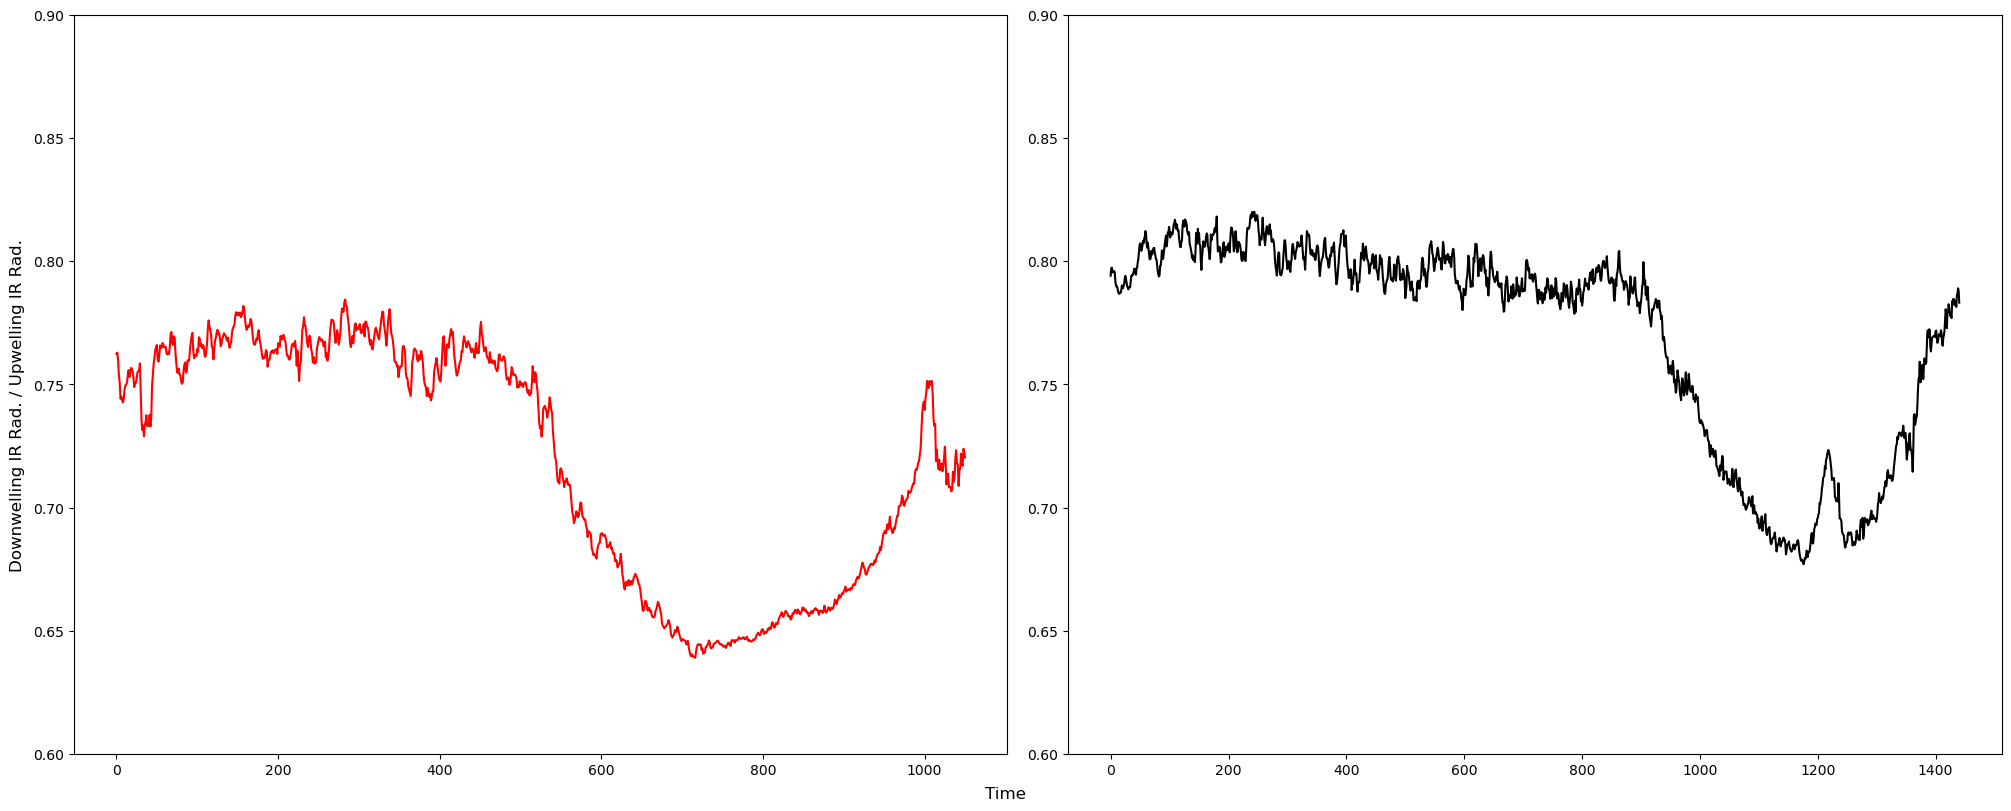

In [3]:
wf_rad = rad.sel(time=slice('2022-01-26T06:30:00','2022-01-27T00:00:00'))
bkg_rad = rad.sel(time=slice('2022-01-03T00:00:00','2022-01-04T00:00:00'))
dust_rad = rad.sel(time=slice('2023-04-06T00:00:00','2023-04-07T00:00:00'))
# dust_rad.down_long_hemisp.plot()
# dust_rad.up_long_hemisp.plot()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=[20,8],layout='constrained')
fig.supxlabel('Time')
fig.supylabel('Downwelling IR Rad. / Upwelling IR Rad.')
ax1.plot((wf_rad.down_long_hemisp/wf_rad.up_long_hemisp),color='red') # Ratio of downwelling and upwelling IR radiation
ax1.set_ylim([0.6,0.9])
ax2.plot((bkg_rad.down_long_hemisp/bkg_rad.up_long_hemisp),color='black') # Ratio of downwelling and upwelling IR radiation
ax2.set_ylim([0.6,0.9])